In [7]:
%matplotlib inline
import pandas as pd
from pysal.lib import examples
from pysal.viz import mapclassify
import seaborn as sns
import geopandas
import numpy as np
import matplotlib.pyplot as plt

In [6]:
!pip install pysal

In [8]:
!pip install pysal contextily

In [9]:
mx = examples.load_example('mexico')

In [10]:
type(mx)

libpysal.examples.builtin.LocalExample

In [12]:
mx.get_file_list()

['/usr/local/lib/python3.7/dist-packages/libpysal/examples/mexico/mexico.csv',
 '/usr/local/lib/python3.7/dist-packages/libpysal/examples/mexico/mexico.gal',
 '/usr/local/lib/python3.7/dist-packages/libpysal/examples/mexico/README.md',
 '/usr/local/lib/python3.7/dist-packages/libpysal/examples/mexico/mexicojoin.shp',
 '/usr/local/lib/python3.7/dist-packages/libpysal/examples/mexico/mexicojoin.dbf',
 '/usr/local/lib/python3.7/dist-packages/libpysal/examples/mexico/mexicojoin.shx',
 '/usr/local/lib/python3.7/dist-packages/libpysal/examples/mexico/mexicojoin.prj']

In [13]:
db = geopandas.read_file(examples.get_path('mexicojoin.shp'))

In [16]:
db.columns

Index(['POLY_ID', 'AREA', 'CODE', 'NAME', 'PERIMETER', 'ACRES', 'HECTARES',
       'PCGDP1940', 'PCGDP1950', 'PCGDP1960', 'PCGDP1970', 'PCGDP1980',
       'PCGDP1990', 'PCGDP2000', 'HANSON03', 'HANSON98', 'ESQUIVEL99', 'INEGI',
       'INEGI2', 'MAXP', 'GR4000', 'GR5000', 'GR6000', 'GR7000', 'GR8000',
       'GR9000', 'LPCGDP40', 'LPCGDP50', 'LPCGDP60', 'LPCGDP70', 'LPCGDP80',
       'LPCGDP90', 'LPCGDP00', 'TEST', 'geometry'],
      dtype='object')

In [18]:
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   POLY_ID     32 non-null     int64   
 1   AREA        32 non-null     float64 
 2   CODE        32 non-null     object  
 3   NAME        32 non-null     object  
 4   PERIMETER   32 non-null     float64 
 5   ACRES       32 non-null     float64 
 6   HECTARES    32 non-null     float64 
 7   PCGDP1940   32 non-null     float64 
 8   PCGDP1950   32 non-null     float64 
 9   PCGDP1960   32 non-null     float64 
 10  PCGDP1970   32 non-null     float64 
 11  PCGDP1980   32 non-null     float64 
 12  PCGDP1990   32 non-null     float64 
 13  PCGDP2000   32 non-null     float64 
 14  HANSON03    32 non-null     float64 
 15  HANSON98    32 non-null     float64 
 16  ESQUIVEL99  32 non-null     float64 
 17  INEGI       32 non-null     float64 
 18  INEGI2      32 non-null     float64 
 19  MA

In [20]:
db.crs

In [22]:
db.crs ='EPSG:4326'

In [24]:
db.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

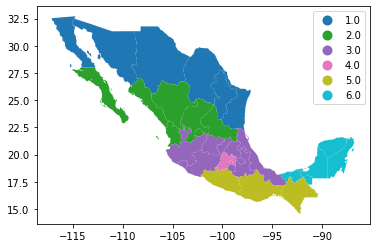

In [28]:
db.plot(column='HANSON03', categorical=True, legend=True)

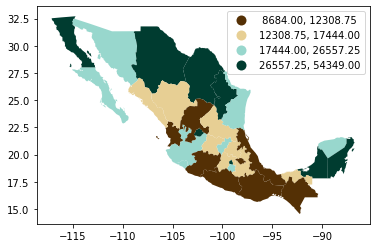

In [34]:
db.plot(column='PCGDP2000',
        scheme='quantiles',
        k=4,
        cmap='BrBG',
        legend=True)

(-102.0, -97.0)

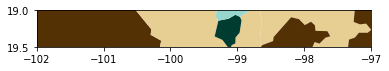

In [40]:
f,ax = plt.subplots(1)
db.plot(column='PCGDP2000',
        scheme='quantiles',
        k=4,
        cmap='BrBG',
        legend=False,
        ax=ax,
        )

ax.set_ylim(19.5,19)
ax.set_xlim(-102,-97)

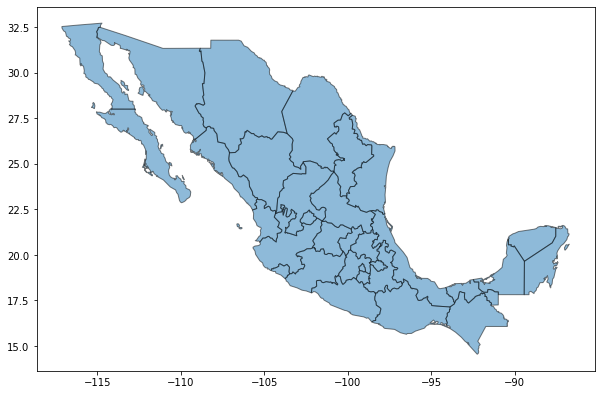

In [42]:
ax=db.plot(figsize=(10,10), alpha=0.5, edgecolor='k')

In [44]:
db = db.to_crs(epsg=3857)

In [45]:
import contextily as ctx

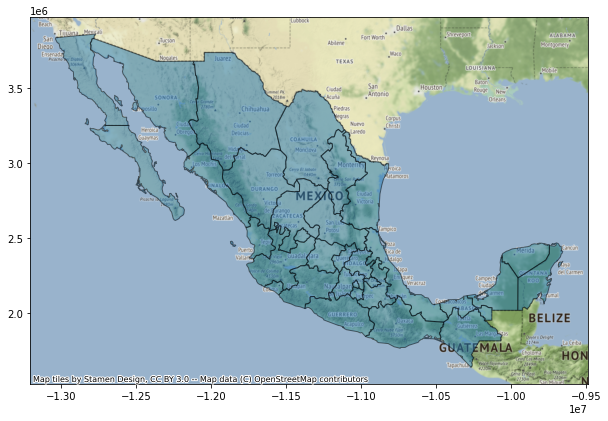

In [47]:
ax=db.plot(figsize=(10,10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)